# Lending Case Study


Problem Statement

A consumer finance company specializing in lending various types of loans to urban customers faces crucial decisions when processing loan applications. The company's decision to approve or deny a loan application depends on the applicant's profile and carries two primary risks:

1. Loss of Business: If an applicant who is likely to repay the loan is denied, the company misses out on potential business.
2. Financial Loss: If an applicant who is likely to default is approved, the company risks incurring financial losses.

The provided dataset includes information about past loan applicants and their default status. The objective is to identify patterns that indicate the likelihood of an applicant defaulting. This information can then be used to inform decisions such as denying the loan, reducing the loan amount, or offering loans to risky applicants at higher interest rates.

In this case study, Exploratory Data Analysis (EDA) will be employed to understand how consumer attributes and loan attributes influence the likelihood of default.

Objectives

The objective is to pinpoint applicants at risk of defaulting on loans, enabling a reduction in credit losses. This case study aims to achieve this goal through exploratory data analysis (EDA) using the provided dataset.

In [452]:
# Importing Python Libraries 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [453]:
df_loan = pd.read_csv(r'D:\Upgrad doc\loan\loan.csv')
df_loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Null values

In [454]:
missing_value = df_loan.isna().sum().sort_values(ascending=False)
print(missing_value)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64


In [455]:

cols_dropped = 0


for col in sorted(df_loan.columns):
   
    if df_loan[col].isna().sum() == df_loan.shape[0]:
        
        cols_dropped += 1


percentage_dropped = (cols_dropped / df_loan.shape[1]) * 100
print(f' dropped columns % = {round(percentage_dropped, 2)}')


 dropped columns % = 48.65


In [456]:
df_loan.dropna(axis=1, how='all', inplace=True)
print(df_loan.shape)

(39717, 57)


### Unique values


In [457]:
remove_columns_list = []
for i in df_loan.columns:
    # Check if unique value count is 1
    if df_loan[i].nunique() == 1:
        remove_columns_list.append(i)
    

# Remove those columns
df_loan.drop(remove_columns_list, axis = 1, inplace = True)

In [458]:
df_loan.shape

(39717, 48)

### Duplicates in rows

In [459]:
df_loan[df_loan.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies


### Dropping records

#### Removing entries with a loan_status of 'Current

To exclude those records where the loan is still in progress, as they do not provide insights into whether the borrower is likely to default or not.

In [460]:
df_loan = df_loan[df_loan['loan_status'].str.lower() != "current"]
df_loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,NaN,Jan-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,NaN,Jun-07,NaN


#### Removing columns where missing data is more than equal to 75%

In [461]:
for c in df_loan.columns:
    missing_percentage = round(df_loan[c].isna().sum() / df_loan.shape[0], 2)
    if missing_percentage >= 0.75:
       df_loan.drop(c, axis=1, inplace=True)
        
print("Updated DataFrame shape:", df_loan.shape)

Updated DataFrame shape: (38577, 46)


#### Removing extra columns 

###### These columns will not contribute to determining whether a loan is approved or denied.

In [462]:
# List the columns which are not required for the analysis. Total 27 columns
drop_columns = [
 'collection_recovery_fee',
 'delinq_2yrs',
 'desc',
 'earliest_cr_line',
 'emp_title',
 'id',
 'inq_last_6mths',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'member_id',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'pub_rec',
 'recoveries',
 'revol_bal',
 'revol_util',
 'title',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'url',
 'zip_code'
]

df_loan.drop(drop_columns, axis = 1, inplace = True)

In [463]:
df_loan.shape

(38577, 19)

### Data Conversion

Convert debt to income (dti), funded amount (funded_amnt), funded amount investor (funded_amnt_inv) and loan amount (loan_amnt) to float to match the data

In [464]:
df_loan = df_loan.astype({
    'dti': 'float',
    'funded_amnt' : 'float',
    'funded_amnt_inv' : 'float',
    'loan_amnt' : 'float'
})

In [465]:
# term column to int type
df_loan['term'] = df_loan['term'].apply(lambda x: int(x.replace('months', '').strip()))

In [466]:
# int_rate column to float type
df_loan['int_rate'] = df_loan['int_rate'].apply(lambda x: float(x.replace('%', '').strip()))

In [467]:
# Rounding 
for c in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    df_loan[c] = df_loan[c].apply(lambda x: round(x, 2))

In [468]:
# Converting the column issue_d from string to DateTime
df_loan['issue_d'] = pd.to_datetime(df_loan['issue_d'], format = '%b-%y')

### Outlier 

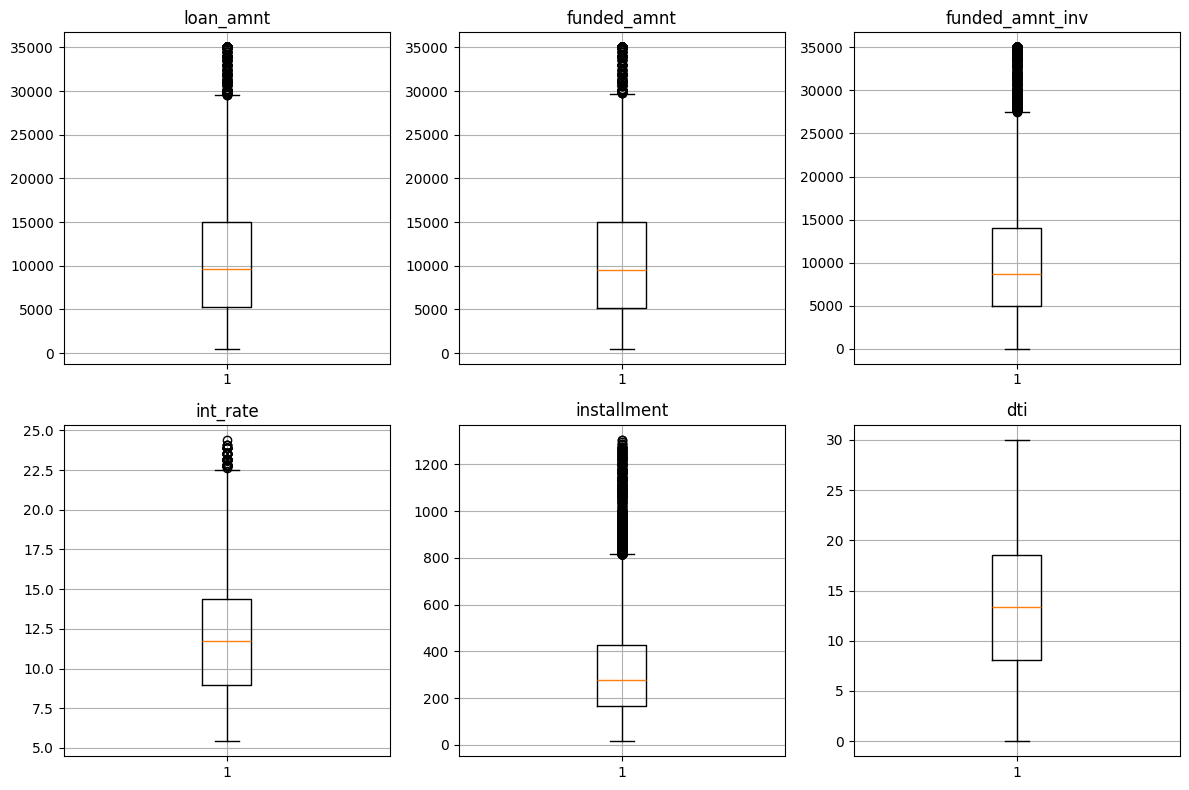

In [469]:
columns_of_interest = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'dti']

# Creating box plots for each column
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_of_interest, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df_loan[col])
    plt.title(col)
    plt.grid(True)

plt.tight_layout()
plt.show()

###  Imputation

In [470]:
# null values in each column
null_counts = df_loan.isnull().sum()

columns_with_nulls = null_counts[null_counts > 0]
print(
columns_with_nulls)


emp_length                 1033
mths_since_last_delinq    24905
pub_rec_bankruptcies        697
dtype: int64


In [471]:
null_percentage = columns_with_nulls/ len(df_loan) * 100
print(null_percentage)

emp_length                 2.677761
mths_since_last_delinq    64.559193
pub_rec_bankruptcies       1.806776
dtype: float64


In [472]:
df_loan.emp_length.isna().sum()

1033

In [473]:
# Annual income of loan applicants whose employment length is missing
df_loan[df_loan.emp_length.isna()]['annual_inc'].describe()

count      1033.000000
mean      45913.330649
std       37964.731520
min        4200.000000
25%       25000.000000
50%       38368.000000
75%       57600.000000
max      648000.000000
Name: annual_inc, dtype: float64

In [474]:
# Most frequent Annual income of loan applicants whose employment length is missing
df_loan[df_loan.emp_length.isna()]['annual_inc'].mode()

0    36000.0
Name: annual_inc, dtype: float64

In [475]:
# Find the most frequent value of employment length
df_loan.emp_length.value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [476]:
df_loan.emp_length.mode()

0    10+ years
Name: emp_length, dtype: object

###### Employment length has 1015 missing values, which means either they are not employed or self-employed (business owners). Considering they have a decent average annual income, we have assumed that these are business owners and we have added their employment duration with the mode value of emp_length which is 10+ years

In [477]:
df_loan.emp_length.fillna(df_loan.emp_length.mode()[0], inplace = True)

###### Mapping employment length with the respective number of years in int

In [478]:
emp_mapping: dict = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
    '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
    '8 years': 8, '9 years': 9, '10+ years': 10
}

# Use the map function to replace values in the 'emp_length' column
df_loan['emp_length'] = df_loan['emp_length'].map(emp_mapping)

In [479]:
df_loan.home_ownership.value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

###### Imputing NONE values as OTHER for home_ownership

In [480]:
df_loan['home_ownership'].replace('NONE', 'OTHER', inplace = True)

In [481]:
df_loan.home_ownership.value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER         101
Name: count, dtype: int64

In [482]:
df_loan.verification_status.value_counts()

verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64

###### Replacing the 'Source Verified' values as 'Verified' since both values mean the same thing i.e. the loan applicant has some source of income which is verified

In [483]:
df_loan['verification_status'].replace('Source Verified', 'Verified', inplace = True)

In [484]:
df_loan.verification_status.value_counts()

verification_status
Verified        21883
Not Verified    16694
Name: count, dtype: int64

In [485]:
df_loan.pub_rec_bankruptcies.isna().sum()

697

In [486]:
df_loan[df_loan.pub_rec_bankruptcies.isna()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,mths_since_last_delinq,pub_rec_bankruptcies
35006,15000.0,15000.0,14875.00,36,8.94,476.58,A,A5,0,MORTGAGE,110000.0,Not Verified,2009-09-01,Fully Paid,credit_card,NY,7.07,0.0,NaN
35058,3000.0,3000.0,2988.24,36,14.26,102.92,C,C5,3,MORTGAGE,80800.0,Not Verified,2009-09-01,Fully Paid,credit_card,TX,14.97,13.0,NaN
35362,4000.0,4000.0,3892.26,36,11.14,131.22,B,B1,0,MORTGAGE,60000.0,Not Verified,2009-08-01,Charged Off,car,MI,11.08,0.0,NaN
38443,2300.0,2300.0,589.61,36,13.17,77.69,D,D2,10,RENT,37152.0,Verified,2008-08-01,Fully Paid,moving,NJ,2.26,46.0,NaN
38717,6000.0,6000.0,500.00,36,8.00,188.02,A,A3,0,MORTGAGE,75000.0,Not Verified,2008-05-01,Fully Paid,other,OH,16.08,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500.0,2500.0,1075.00,36,8.07,78.42,A,A4,4,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,home_improvement,CO,11.33,0.0,NaN
39713,8500.0,8500.0,875.00,36,10.28,275.38,C,C1,3,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,credit_card,NC,6.40,5.0,NaN
39714,5000.0,5000.0,1325.00,36,8.07,156.84,A,A4,0,MORTGAGE,100000.0,Not Verified,2007-07-01,Fully Paid,debt_consolidation,MA,2.30,0.0,NaN
39715,5000.0,5000.0,650.00,36,7.43,155.38,A,A2,0,MORTGAGE,200000.0,Not Verified,2007-07-01,Fully Paid,other,MD,3.72,0.0,NaN


#### Dropping those rows with pub_rec_bankruptcies, as they cannot be imputed.

In [487]:
df_loan = df_loan[df_loan.pub_rec_bankruptcies.notna()]

In [488]:
df_loan.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
addr_state                    0
dti                           0
mths_since_last_delinq    24899
pub_rec_bankruptcies          0
dtype: int64

If Column mths_since_last_delinq th is null, it can mean that 

No History of Delinquency: The borrower has never been delinquent on any of their debt obligations. This is often the most likely explanation and generally indicates a positive credit history.


##  Data Analysis
1. Derived Columns
2. Univariate Analysis (including Segmented Univariate Analysis)
3. Bivariate Analysis
4. Multivariate

###  Derived Columns
1. Derived metrics for Month (issue_m), Year (issue_y) and Quarter (issue_q) from column "issue_d"
2. Create new column loan_paid with 'Yes' and 'No' values based on loan_status column where 'Yes' = "Fully Paid" and 'No' = "Charged off"
3. Creating different categories for loan amount , interest rate, annual income 

####  Derived metrics for Month (issue_m), Year (issue_y) and Quarter (issue_quater) from column "issue_d"

In [489]:
# Extracting Month and Year for analysis from issue_d
df_loan['issue_m'] = pd.DatetimeIndex(df_loan['issue_d']).month
df_loan['issue_y'] = pd.DatetimeIndex(df_loan['issue_d']).year

In [490]:
def assign_quarter(value, bounds, quarters) -> str:
    """
    Assigns a quarter based on specified bounds and quarter labels.

    Parameters:
        value (float): The numeric value to be assigned a quarter.
        bounds (list of float): The list of boundary values for assigning quarters.
        quarters (list of str): The list of quarter labels.

    Returns:
        str: The quarter label for the given value.
    """
    for i, bound in enumerate(bounds):
        if value < bound:
            return quarters[i]
    return quarters[-1]


In [491]:
# Extracting Month and Year for analysis from issue_date
df_loan['issue_month'] = pd.DatetimeIndex(df_loan['issue_d']).month
df_loan['issue_year'] = pd.DatetimeIndex(df_loan['issue_d']).year

# Categorizing Months into quarterly buckets
quarter_thresholds = [4, 7, 10]
quarter_names = ['Q1', 'Q2', 'Q3', 'Q4']
df_loan['issue_quarter'] = df_loan['issue_month'].apply(assign_quarter, args=(quarter_thresholds, quarter_names))


In [492]:
df_loan[['issue_d', 'issue_m', 'issue_quarter']]

,issue_d,issue_m,issue_quarter
0,2011-12-01,12,Q4
1,2011-12-01,12,Q4
2,2011-12-01,12,Q4
3,2011-12-01,12,Q4
5,2011-12-01,12,Q4
...,...,...,...
39562,2007-11-01,11,Q4
39573,2007-11-01,11,Q4
39623,2007-10-01,10,Q4
39666,2007-08-01,8,Q3


#### Create a new column loan_paid with values 'Yes' and 'No' based on the loan_status column, where 'Y' corresponds to "Fully Paid" and 'N' corresponds to "Charged Off".

In [493]:
loan_status_map = {'Charged Off': 'N', 'Fully Paid': 'Y' }
df_loan['loan_paid'] = df_loan['loan_status'].map(loan_status_map)

#### Creating different categories for loan amounts (loan_amount_category), interest rates (interest_rate_category), annual incomes (annual_income_category), funded amounts (funded_amount_category), and debt-to-income ratios (dti_category

In [494]:
# Categorizing Loan Amounts
amount_intervals = [5000, 10000, 15000]
amount_labels = ['0 - 5K', '5K - 10K', '10K - 15K', '15K - above']
df_loan['loan_amount_category'] = df_loan['loan_amnt'].apply(assign_quarter, args=(amount_intervals, amount_labels))


In [495]:
df_loan[['loan_amnt', 'loan_amount_category']]

,loan_amnt,loan_amount_category
0,5000.0,5K - 10K
1,2500.0,0 - 5K
2,2400.0,0 - 5K
3,10000.0,10K - 15K
5,5000.0,5K - 10K
...,...,...
39562,4800.0,0 - 5K
39573,7000.0,5K - 10K
39623,9000.0,5K - 10K
39666,15450.0,15K - above


In [496]:
# Categorizing interest rates
interest_rate_thresholds = [6, 12, 18, 24]
interest_rate_labels = ['0%-6%', '6%-12%', '12%-18%', '18%-24%', '24%-30%']
df_loan['interest_rate_category'] = df_loan['int_rate'].apply(assign_quarter, args=(interest_rate_thresholds, interest_rate_labels))
df_loan[['int_rate', 'interest_rate_category']]


,int_rate,interest_rate_category
0,10.65,6%-12%
1,15.27,12%-18%
2,15.96,12%-18%
3,13.49,12%-18%
5,7.90,6%-12%
...,...,...
39562,10.28,6%-12%
39573,10.59,6%-12%
39623,12.49,12%-18%
39666,11.22,6%-12%


In [497]:
df_loan[['int_rate', 'interest_rate_category']]

,int_rate,interest_rate_category
0,10.65,6%-12%
1,15.27,12%-18%
2,15.96,12%-18%
3,13.49,12%-18%
5,7.90,6%-12%
...,...,...
39562,10.28,6%-12%
39573,10.59,6%-12%
39623,12.49,12%-18%
39666,11.22,6%-12%


In [498]:
# Categorizing annual incomes
income_thresholds = [45000, 55000, 65000, 75000, 85000]
income_labels = ['0 - 45k', '45k - 55k', '55k - 65k', '65k - 75k', '75k - 85k', '85k - above']
df_loan['annual_income_category'] = df_loan['annual_inc'].apply(assign_quarter, args=(income_thresholds, income_labels))


In [499]:
df_loan[['annual_inc', 'annual_income_category']]

,annual_inc,annual_income_category
0,24000.0,0 - 45k
1,30000.0,0 - 45k
2,12252.0,0 - 45k
3,49200.0,45k - 55k
5,36000.0,0 - 45k
...,...,...
39562,35000.0,0 - 45k
39573,63500.0,55k - 65k
39623,39000.0,0 - 45k
39666,40000.0,0 - 45k


### Univariate Analysis

Following fields will be checked as part of univariate analysis

#### 1. Categorical variables
    1. Ordered categorical data
    2. Unordered categorical data
        
    
#### 2. Quantitative variables
  
    

#### Ordered Categorical Variables

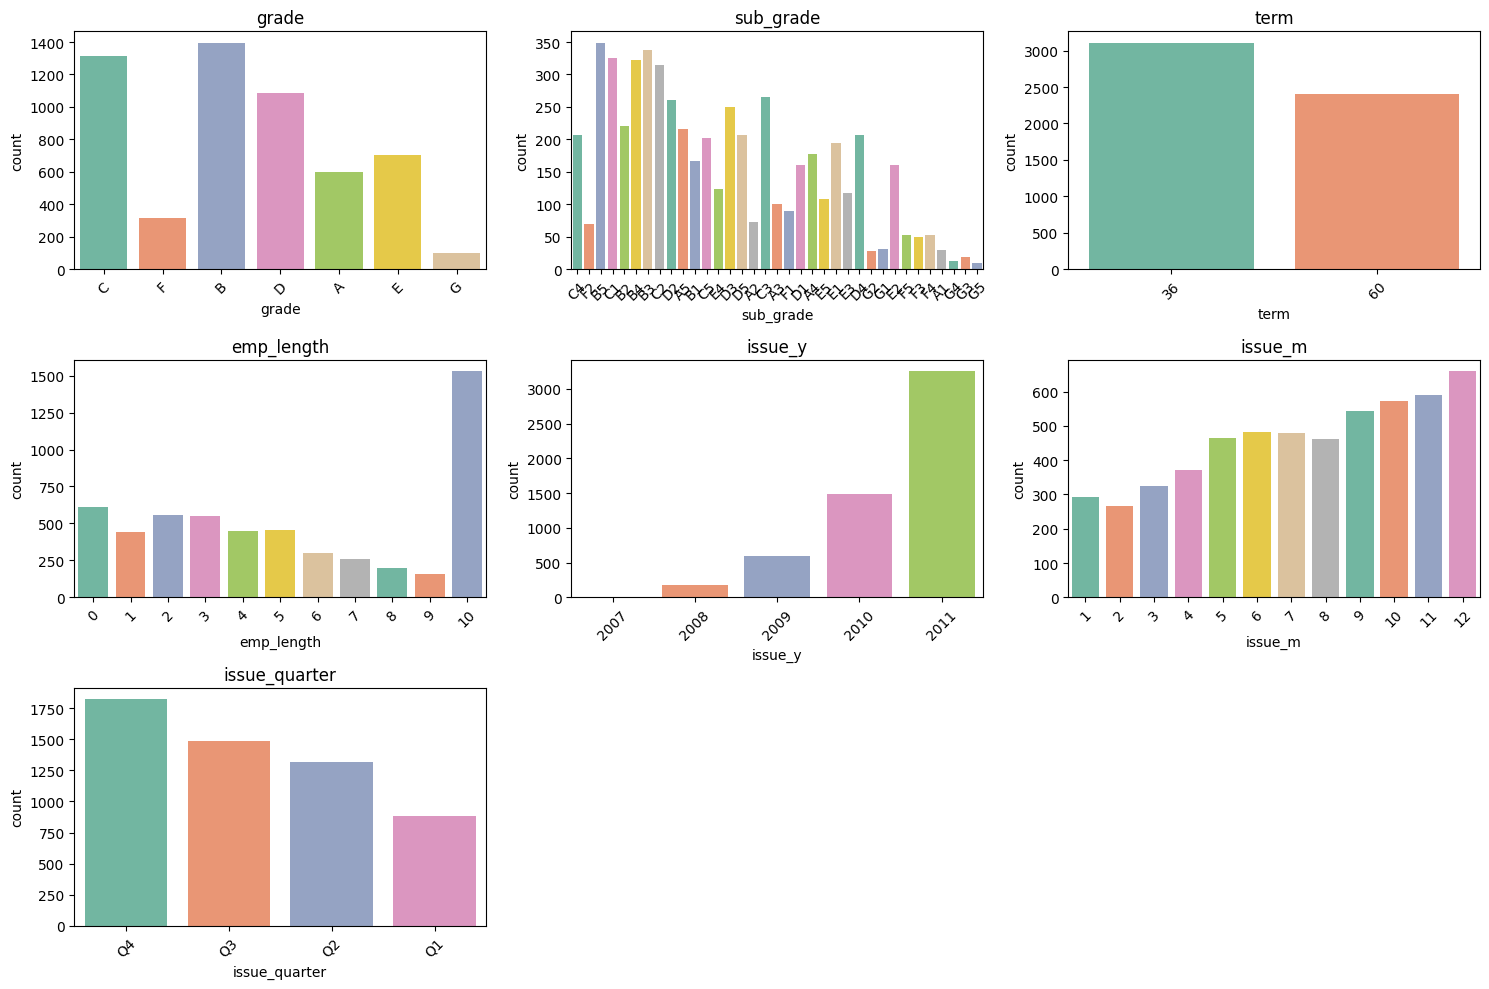

In [500]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns for bar plots
columns_of_interest = ['grade', 'sub_grade', 'term', 'emp_length', 'issue_y', 'issue_m', 'issue_quarter']
df_loan_1=df_loan[df_loan['loan_status']=='Charged Off']
plt.figure(figsize=(15, 10))  
for i, col in enumerate(columns_of_interest, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df_loan_1, x=col, palette='Set2') 
    plt.title(col)
    plt.xticks(rotation=45)  
    plt.tight_layout()
   

plt.show()


#### Unordered Categorical Variables

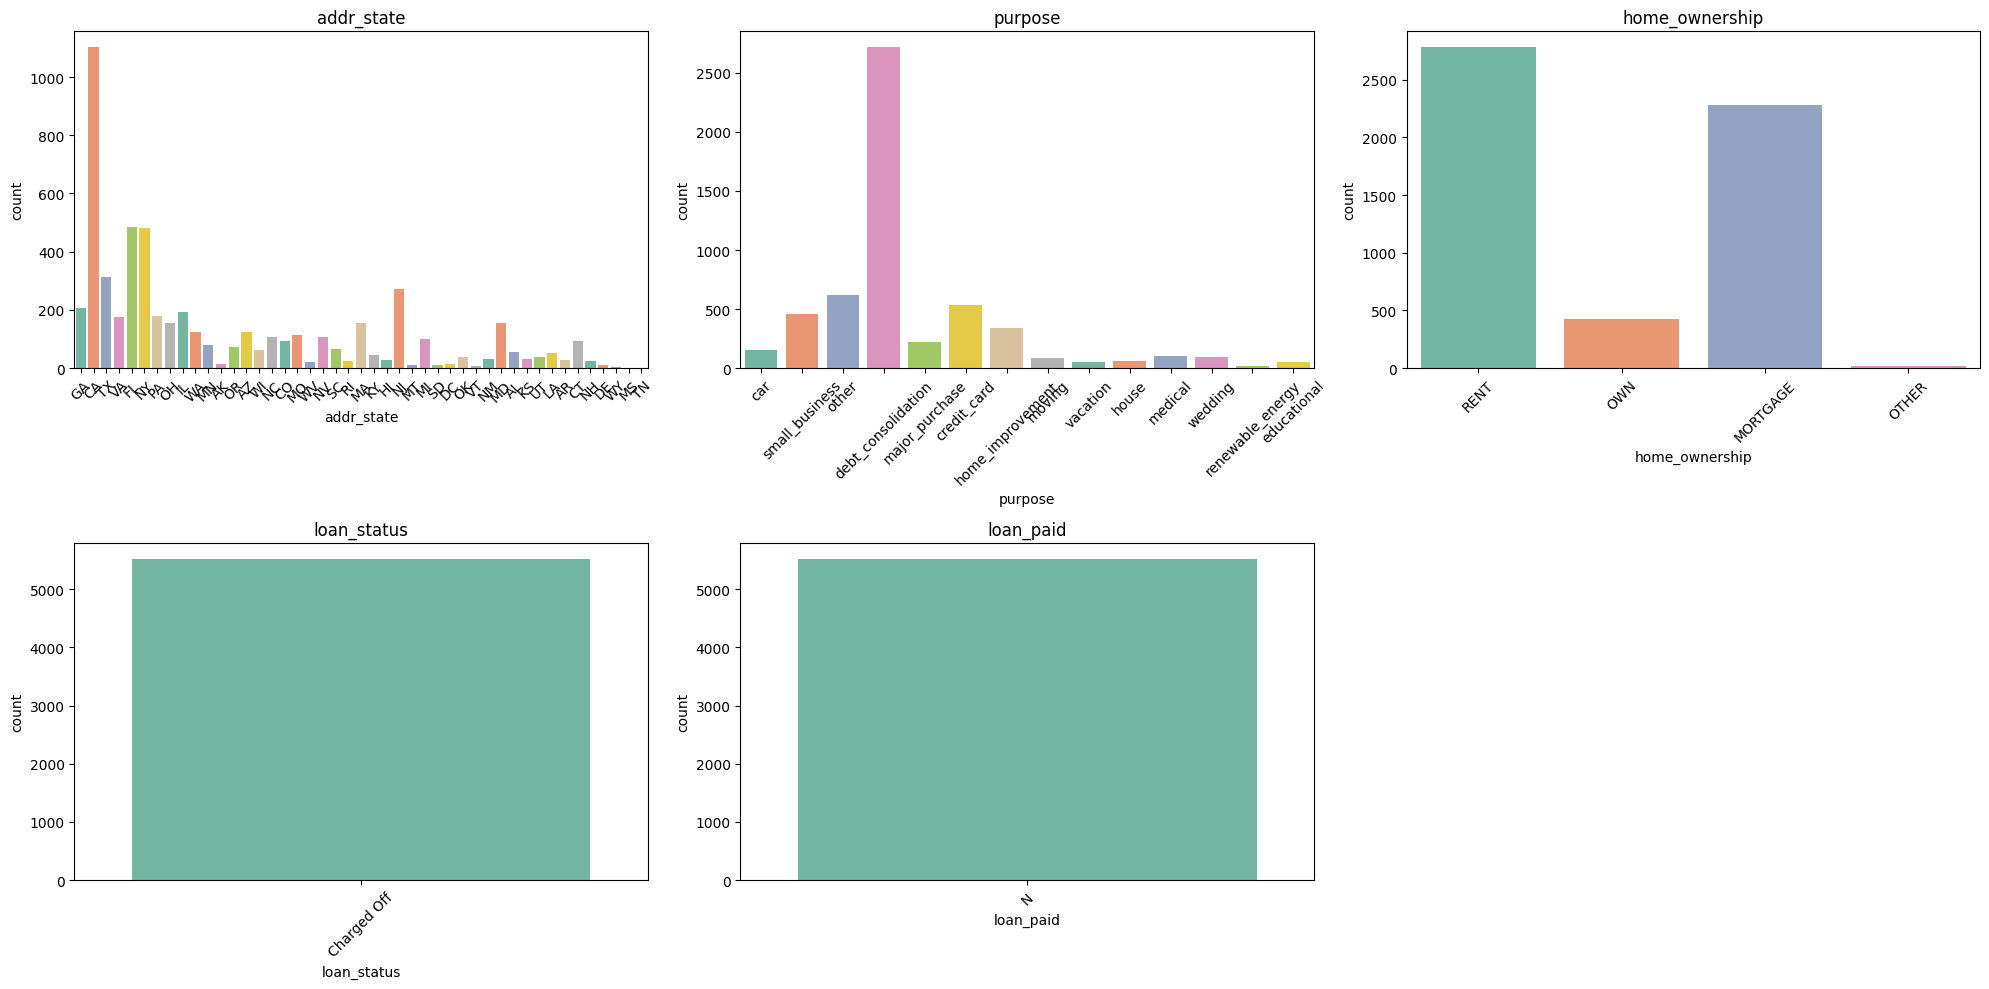

In [501]:
columns_of_interest = ['addr_state', 'purpose', 'home_ownership', 'loan_status', 'loan_paid']


plt.figure(figsize=(20, 10))  
for i, col in enumerate(columns_of_interest, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df_loan_1, x=col, palette='Set2')  
    plt.title(col)
    plt.xticks(rotation=45)  
    plt.tight_layout()

plt.show()

#### Quantitative variables

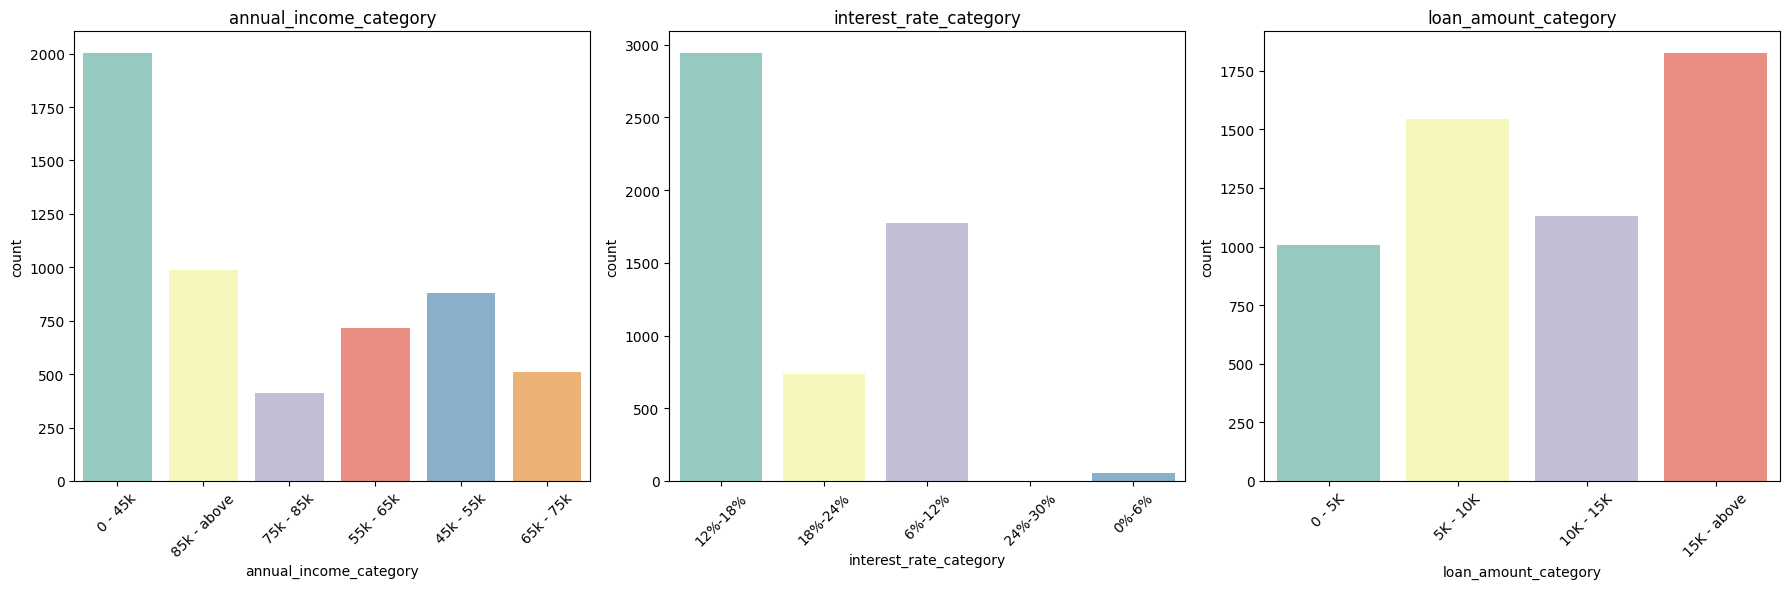

In [502]:
columns_of_interest = ['annual_income_category', 'interest_rate_category', 'loan_amount_category']

df_loan_1=df_loan[df_loan['loan_status']=='Charged Off']
plt.figure(figsize=(18, 6))  
for i, col in enumerate(columns_of_interest, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df_loan_1, x=col, palette='Set3') 
    plt.title(col)
    plt.xticks(rotation=45) 
    plt.tight_layout()

plt.show()

In [503]:
installments_df = df_loan[df_loan.loan_paid == 'No']

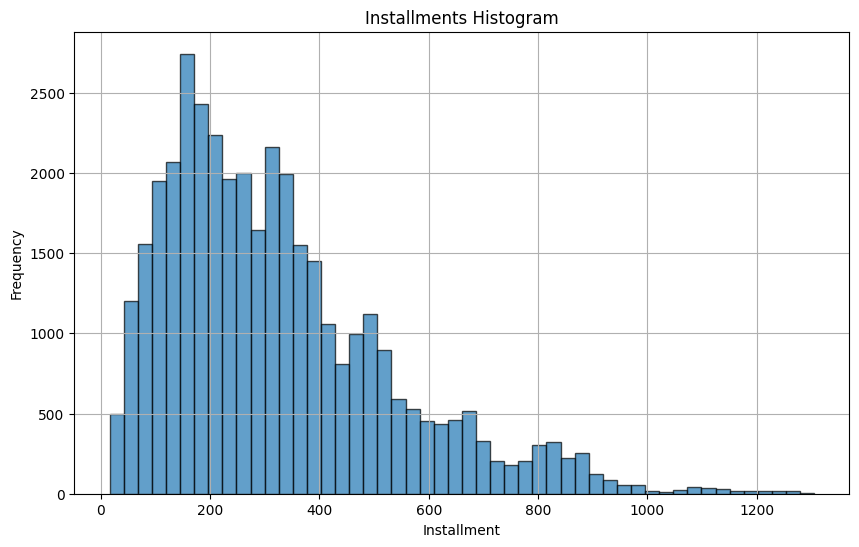

In [504]:
def plot_histogram(dataframe, column='installment', bins=50, title='Installments', xlabel='Installment', ylabel='Frequency'):
    plt.figure(figsize=(10, 6))
    plt.hist(dataframe[column], bins=bins, edgecolor='black', alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Example usage:
plot_histogram(df_loan, column='installment', bins=50, title='Installments Histogram', xlabel='Installment', ylabel='Frequency')

### Bivariate Analysis

Following fields will be analysed as part of bivariate analysis against Loan Status (`loan_status`) column

####  Categorical variables
    1. Ordered categorical data   
    2. Unordered categorical data      
####  Quantitative variables

### Bivariate Analysis of Ordered Categorical Variables

#### Grade vs. Loan Status

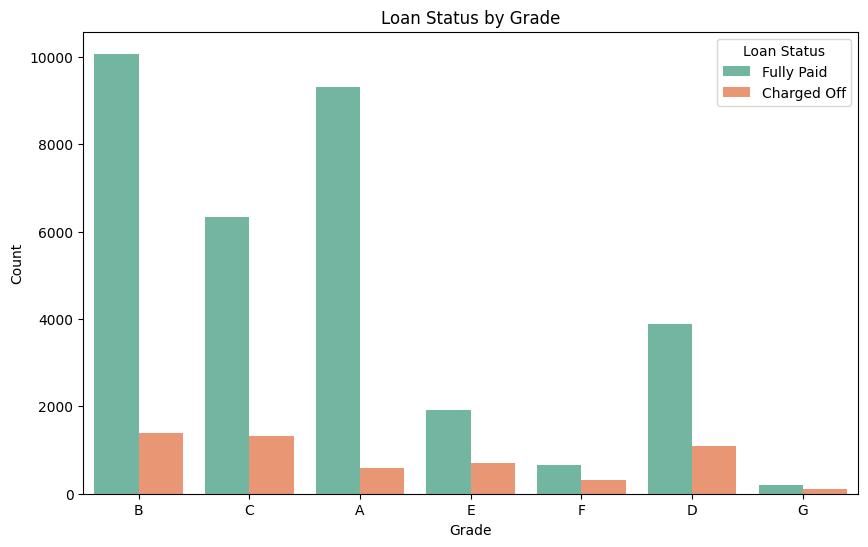

In [505]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))


sns.countplot(data=df_loan, x='grade', hue='loan_status', palette='Set2')


plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Loan Status by Grade')
plt.legend(title='Loan Status')

plt.show()


###### The loan applicants belonging to Grades B, C and D contribute to most number of "Charged Off" loans

#### Sub Grade vs. Loan Status

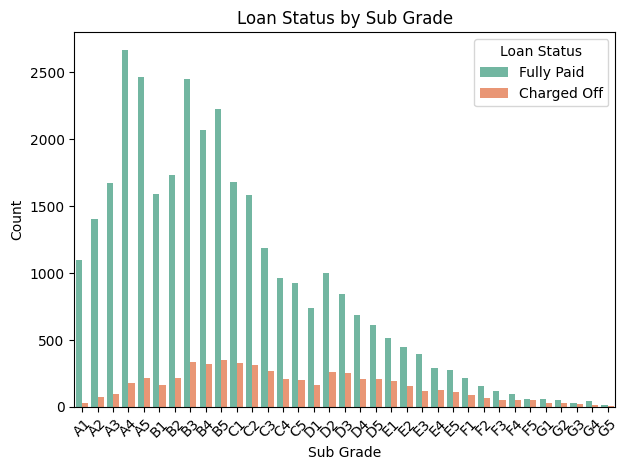

In [506]:
# Create the countplot
sns.countplot(data=df_loan, x='sub_grade', hue='loan_status', palette='Set2', order=sorted(df_loan['sub_grade'].unique()))


plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.title('Loan Status by Sub Grade')
plt.legend(title='Loan Status')


plt.xticks(rotation=45)


plt.tight_layout()

###### Loan applicants belonging to Sub Grades B3, B4, and B5 are likely to Charge off

#### Term vs. Loan Status

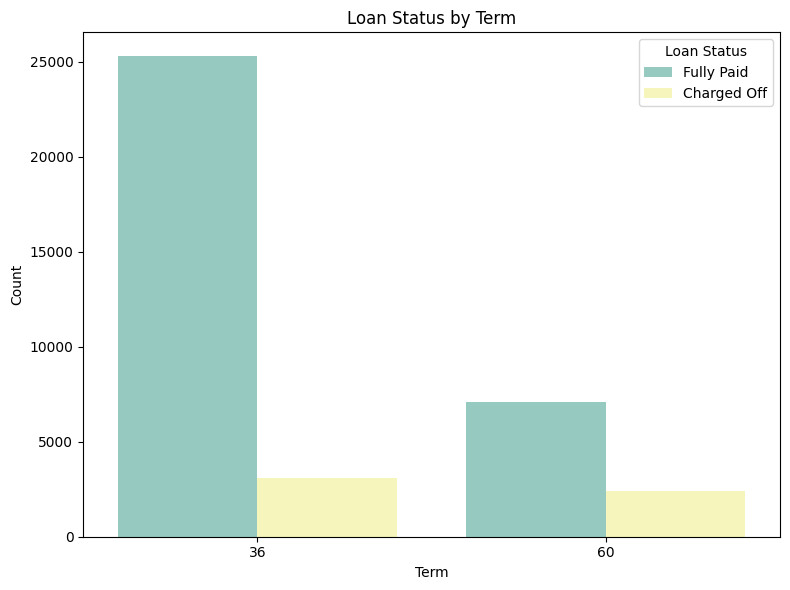

In [507]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_loan, x='term', hue='loan_status', palette='Set3')

plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Loan Status by Term')
plt.legend(title='Loan Status')

plt.tight_layout()
plt.show()

#### Loan Year vs. Loan Status

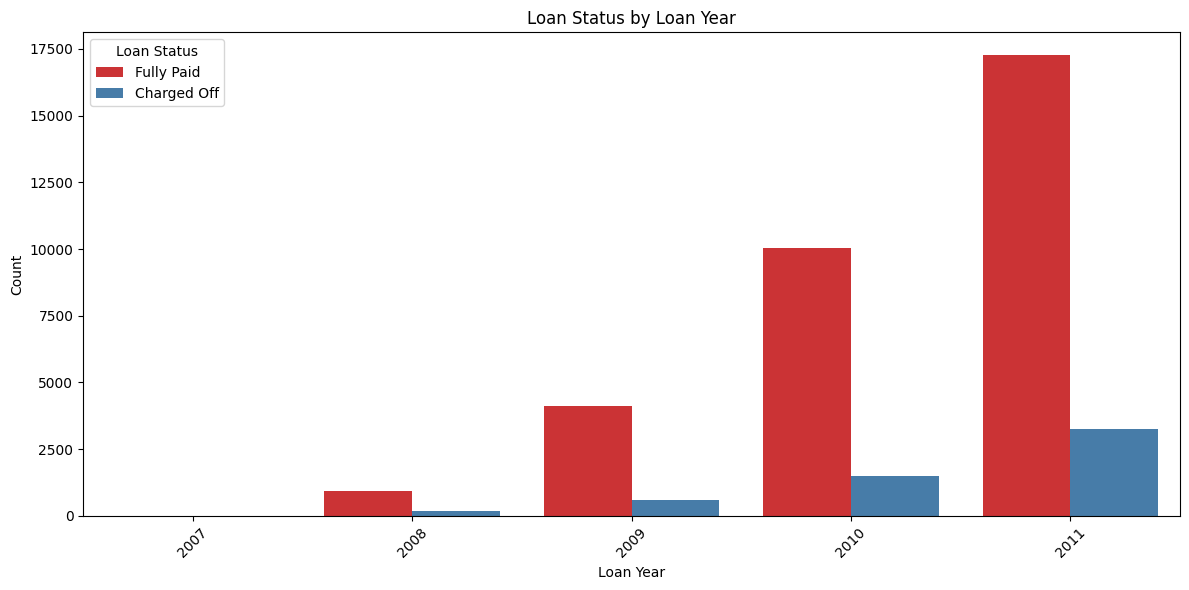

In [508]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_loan, x='issue_y', hue='loan_status', palette='Set1')

plt.xlabel('Loan Year')
plt.ylabel('Count')
plt.title('Loan Status by Loan Year')
plt.legend(title='Loan Status')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()

###### The loan applicants have increased steadily from 2007 to 2011 showcasing positive trend in the upcoming years.

#### Loan Month vs. Loan Status

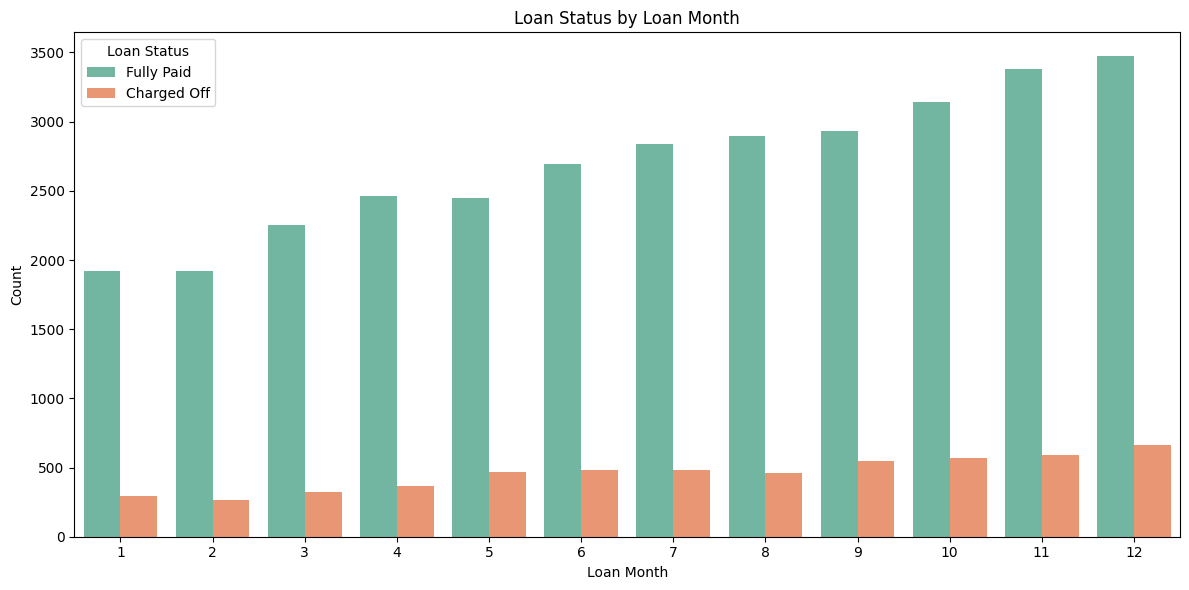

In [509]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_loan, x='issue_m', hue='loan_status', palette='Set2')

plt.xlabel('Loan Month')
plt.ylabel('Count')
plt.title('Loan Status by Loan Month')
plt.legend(title='Loan Status')

plt.xticks(rotation=0)  # Rotate x-axis labels if necessary

plt.tight_layout()
plt.show()

###### The month of December is the most preferred month of taking loans. This may be due to the holiday season.

###### Q4 is the most preferred quarter for taking loans. This is mainly due to the holiday season coming up.

### Bivariate Analysis of Unordered Categorical Variables

#### Purpose vs. Loan Status

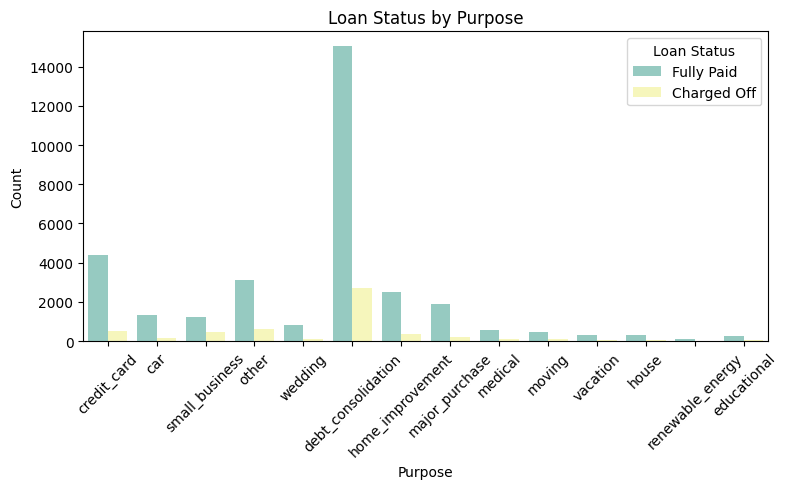

In [510]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_loan, x='purpose', hue='loan_status', palette='Set3')

plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Loan Status by Purpose')
plt.legend(title='Loan Status')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()

###### Debt consolidation is the category where maximum loans are issued and people have defaulted the most in the same category.

#### Home Ownership vs. Loan Status

([0, 1, 2, 3],
 [Text(0, 0, 'RENT'),
  Text(1, 0, 'OWN'),
  Text(2, 0, 'MORTGAGE'),
  Text(3, 0, 'OTHER')])

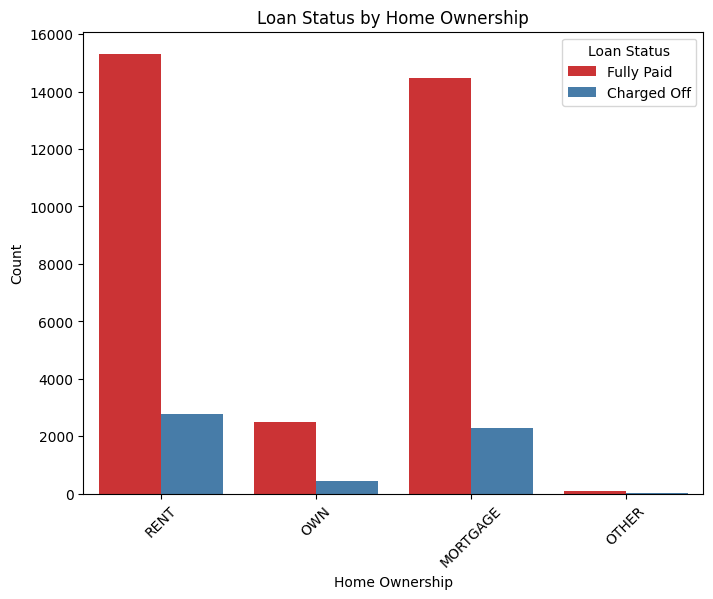

In [511]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_loan, x='home_ownership', hue='loan_status', palette='Set1')

plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Loan Status by Home Ownership')
plt.legend(title='Loan Status')

plt.xticks(rotation=45)

###### The loan applicants who live in a rented or mortgaged house are more likely to default

#### Verification Status vs. Loan Status

([0, 1], [Text(0, 0, 'Verified'), Text(1, 0, 'Not Verified')])

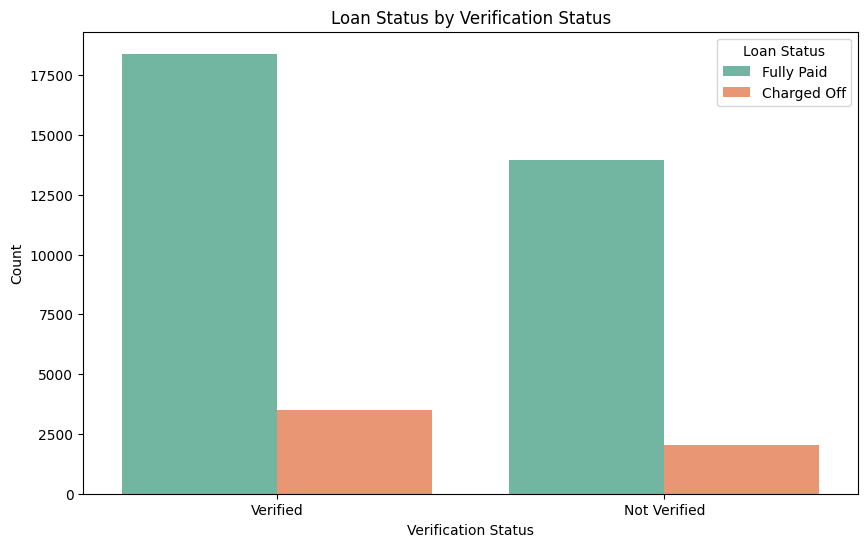

In [512]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_loan, x='verification_status', hue='loan_status', palette='Set2')

plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Loan Status by Verification Status')
plt.legend(title='Loan Status')

plt.xticks(rotation=0)

###### The loan applicants who have been verified are defaulting more than the applicants who are not verified

## Multivariate Analysis

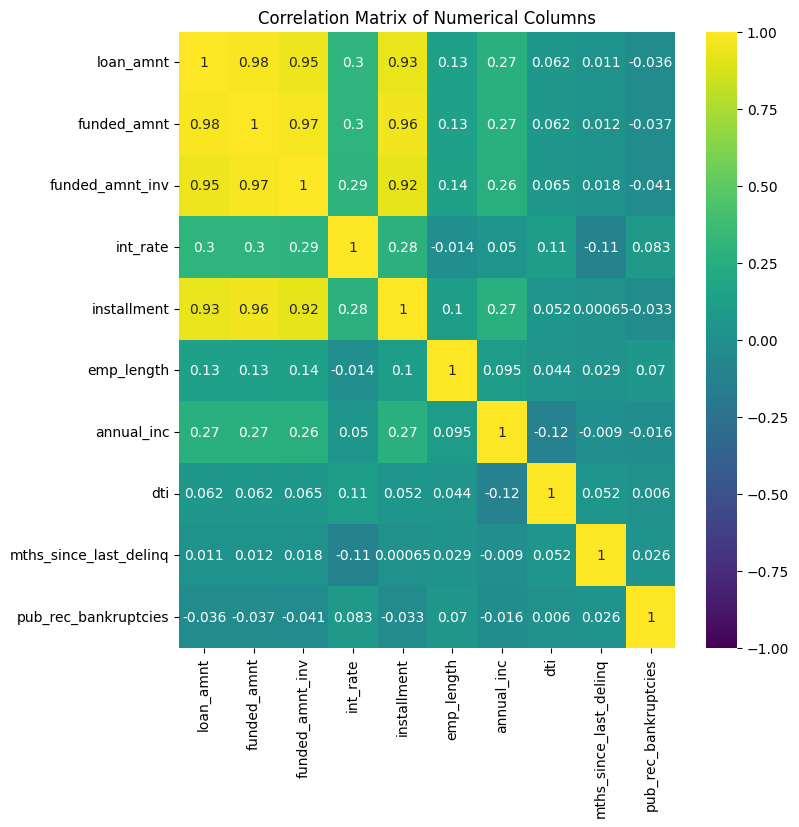

In [513]:
columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
           'installment', 'emp_length', 'annual_inc', 'dti', 
           'mths_since_last_delinq', 'pub_rec_bankruptcies']


df_numerical = df_loan[columns]

# Calculate the correlation matrix
corr_matrix = df_numerical.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()